<a href="https://colab.research.google.com/github/Rakshit358/SentimentAnalysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import pickle
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer as wnl
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rakshitbenjwal","key":"c2c5404e99d91e80f21f9db101b119f6"}'}

In [6]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [20]:
DATASET_COLUMN = ["sentiment","ids","date","flag","user","text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('training.1600000.processed.noemoticon.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMN)

In [26]:
dataset = dataset[['sentiment','text']]
dataset['sentiment'] = dataset['sentiment'].replace(4,1)
dataset.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


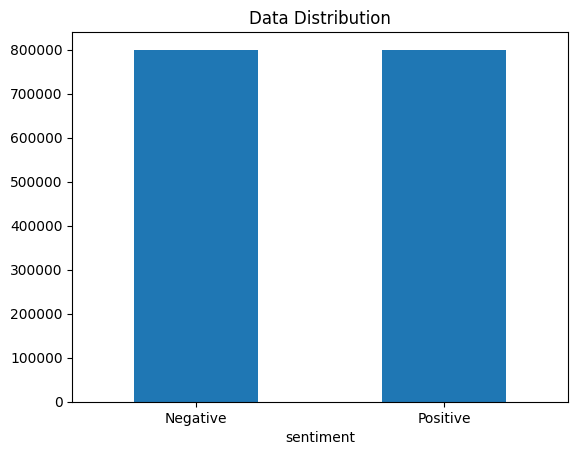

In [28]:
ax = dataset.groupby('sentiment').count().plot(kind='bar',title='Data Distribution',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'],rotation=0)
text = list(dataset['text'])
sentiment = list(dataset['sentiment'])

In [42]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}


stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [47]:
from nltk.stem import WordNetLemmatizer

In [48]:
def preprocess(textdata):
  processedText = []
  wordLem = WordNetLemmatizer()
  urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
  userPattern       = '@[^\s]+'
  alphaPattern      = "[^a-zA-Z0-9]"
  sequencePattern   = r"(.)\1\1+"
  seqReplacePattern = r"\1\1"

  for tweet in text:
    tweet = tweet.lower()
    tweet = re.sub(urlPattern,'URL',tweet)
    for emoji in emojis.keys():
      tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
    tweet = re.sub(userPattern,'USER', tweet)
    tweet = re.sub(alphaPattern, " ", tweet)
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    tweetWords = ''
    for word in tweet.split():
      if len(word)>1:
        word = wordLem.lemmatize(word)
        tweetWords += (word+' ')
    processedText.append(tweetWords)

  return processedText

In [49]:
preprocessedText = preprocess(text)

In [53]:
dataset['text'] = preprocessedText

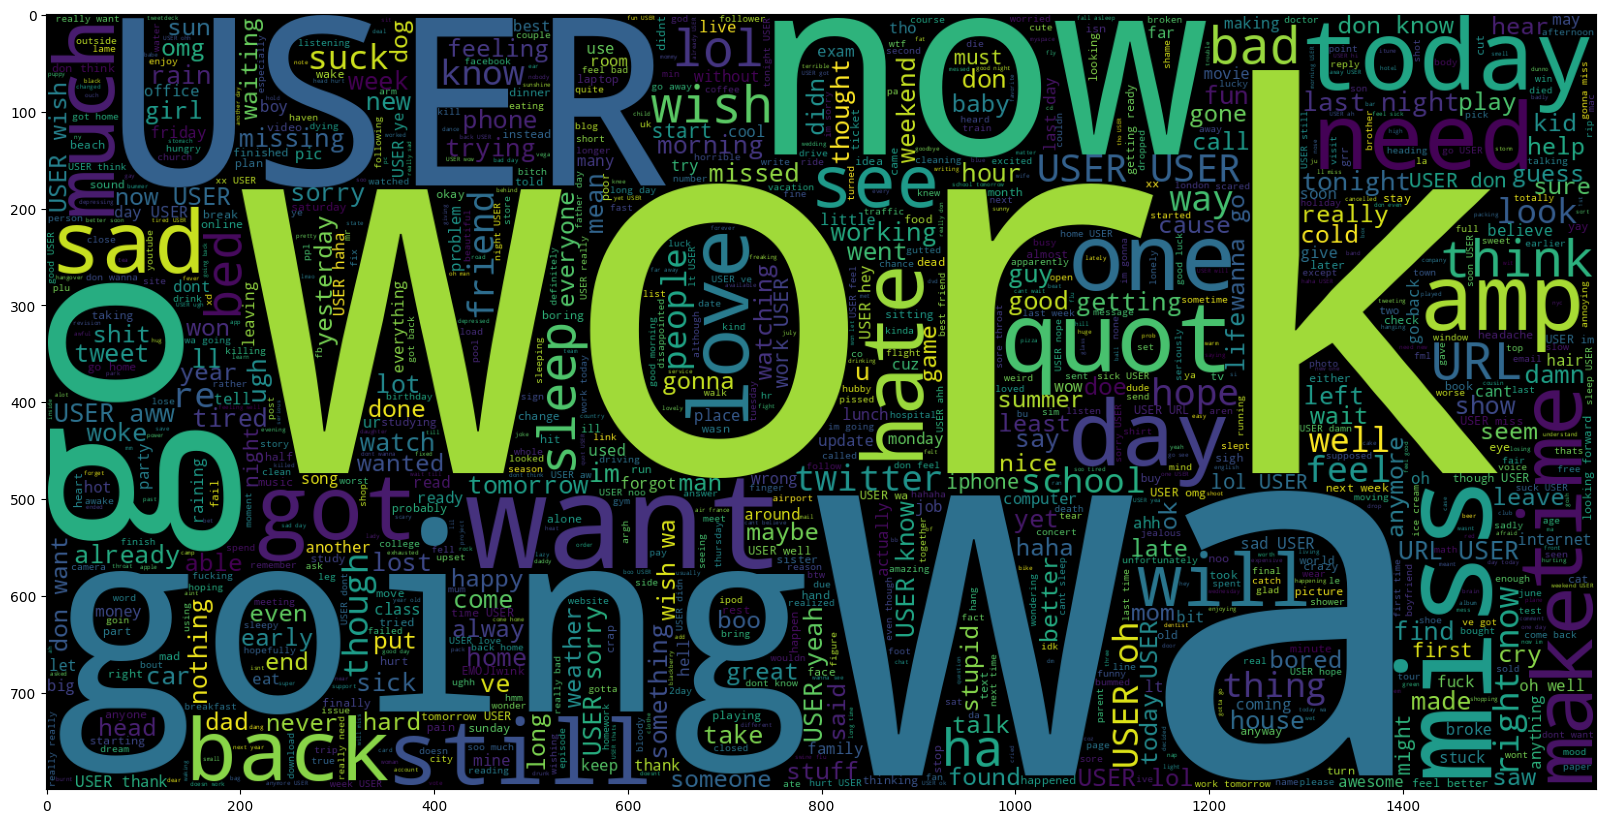

In [54]:
negatives = preprocessedText[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(negatives))
plt.imshow(wc)

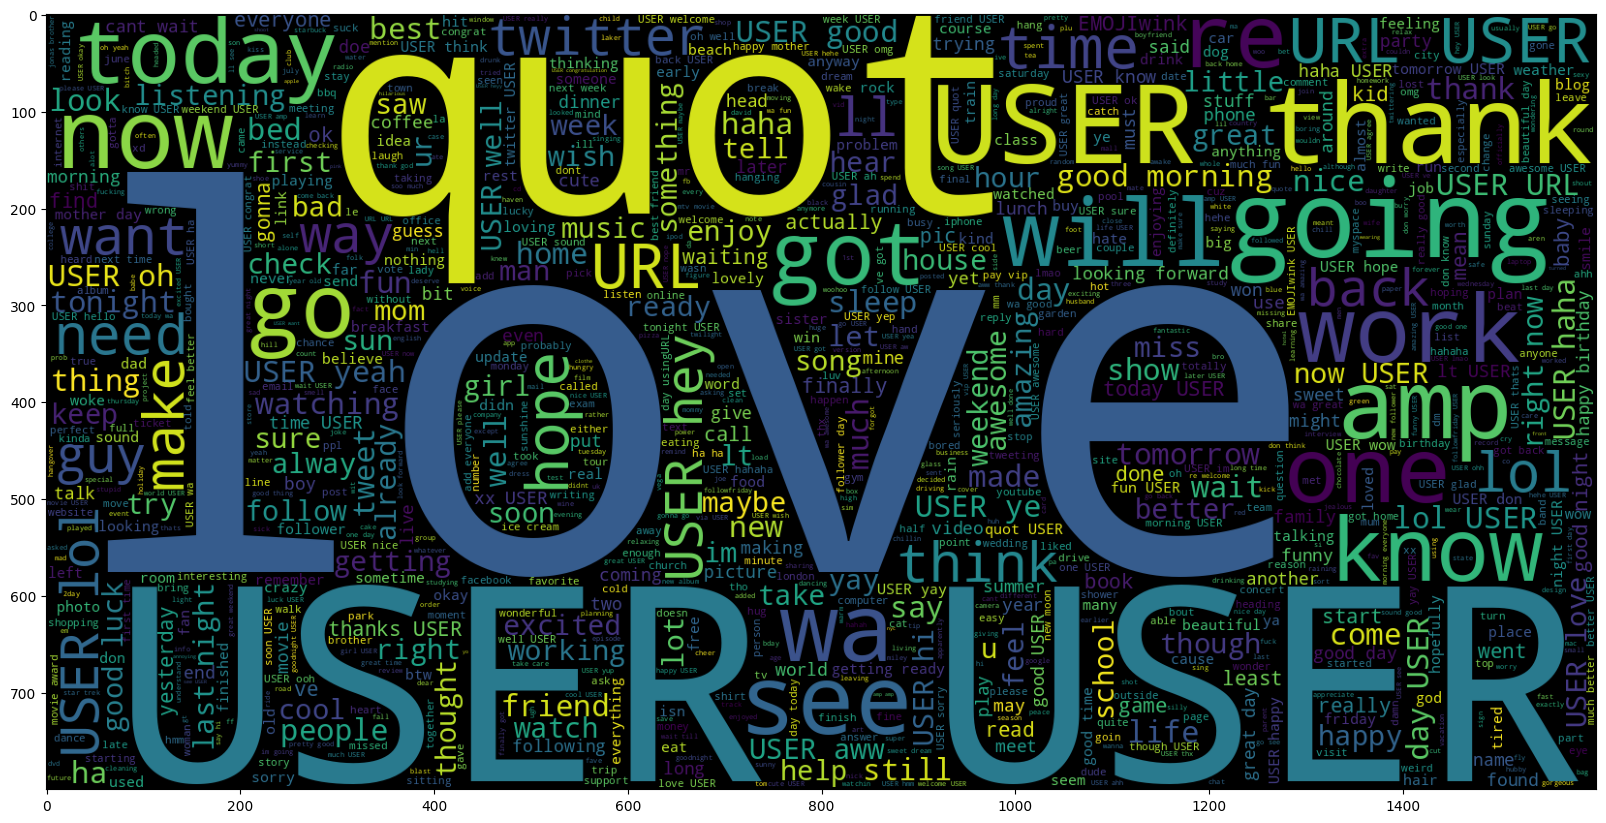

In [55]:
positives = preprocessedText[800000:]
plt.figure(figsize=(20,20))
wc2 = WordCloud(max_words=1000,width=1600,height=800).generate(" ".join(positives))
plt.imshow(wc2)

In [56]:
X_train,X_test,y_train,y_test = train_test_split(preprocessedText,sentiment,
                                                 test_size=0.05,random_state=0)

In [58]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vectorizer.fit(X_train)
print("Number of features: ",len(vectorizer.get_feature_names_out()))

Number of features:  500000


In [59]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [60]:
def evaluate_model(model):
  y_pred = model.predict(X_test)

  print(classification_report(y_test,y_pred))

  cf_matrix = confusion_matrix(y_test,y_pred)

  categories = ["Negatives","Positives"]
  group_names = ["True Negatives","False Positives","False Negatives","True Positives"]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

  labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39989
           1       0.80      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



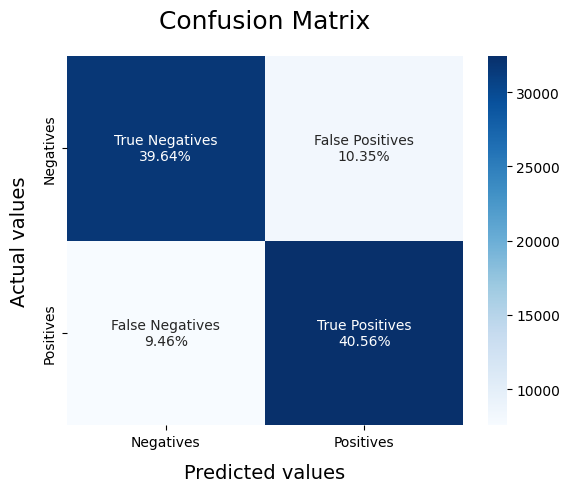

In [61]:
BNBModel = BernoulliNB(alpha=2)
BNBModel.fit(X_train,y_train)
evaluate_model(BNBModel)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.81      0.82     39989
           1       0.81      0.83      0.82     40011

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



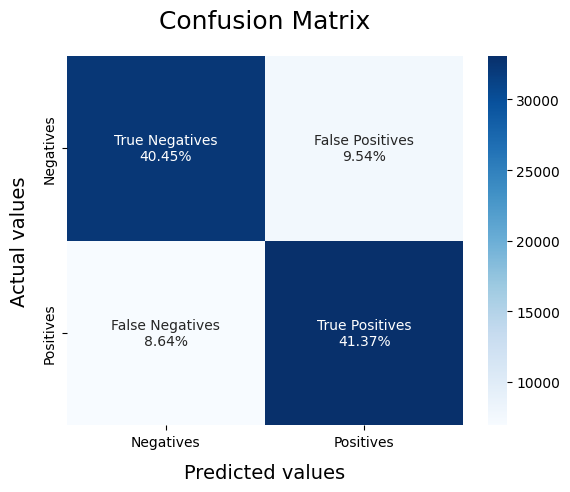

In [62]:
SVCModel = LinearSVC()
SVCModel.fit(X_train,y_train)
evaluate_model(SVCModel)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.82      0.84      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



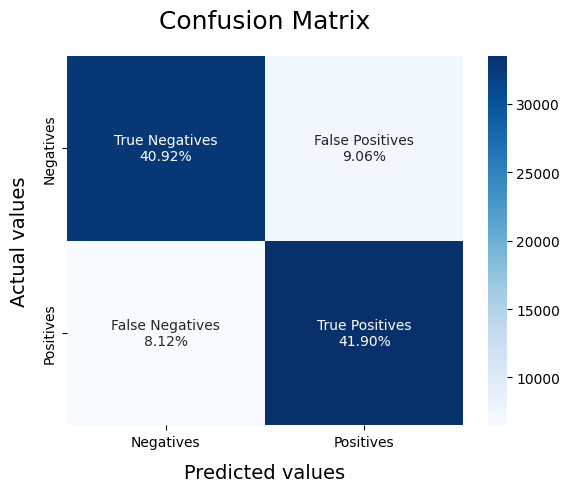

In [63]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
evaluate_model(LRmodel)

In [65]:
with open('/content/svc.pickle', 'wb') as file:
    pickle.dump(SVCModel, file)

# Save the Logistic Regression model
with open('/content/lr.pickle', 'wb') as file:
    pickle.dump(LRmodel, file)

# Save the Naive Bayes model
with open('/content/bnb.pickle', 'wb') as file:
    pickle.dump(BNBModel, file)

In [66]:
from google.colab import files

# Download the vectorizer file
files.download('/content/vectoriser-ngram-(1,2).pickle')

# Download the Logistic Regression model file
files.download('/content/lr.pickle')

# Download the Naive Bayes model file
files.download('/content/bnb.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
files.download('/content/svc.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>